In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Research data files
auto_stocks = "Stock_Data/Auto_stock_data.csv"
SP = "Stock_Data/Stock_Data.csv"
car_sales = "Car_sales_Data/Car_data.csv"
autogroup_marketshare = "Car_sales_Data/Autogroup_marketshare_est.csv"

# Read the data 
autostocks_data = pd.read_csv(auto_stocks)  # Auto stocks daily price data for 2019 and 2020
SP_data = pd.read_csv(SP)   # S&P daily price data for 2019 and 2020
car_sales_data = pd.read_csv(car_sales)  # Avg car brand sales price for grouping
AG_marketshare_data = pd.read_csv(autogroup_marketshare)  # Avg Auto Group marketshare for grouping

In [2]:
# Display auto companies' stock price dataframe for preview.
autostocks_data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Co
0,1/2/2019,885.599976,885.599976,885.599976,885.599976,880.801819,0,AUDVF,Audi
1,1/3/2019,885.599976,885.599976,885.599976,885.599976,880.801819,0,AUDVF,Audi
2,1/4/2019,885.599976,885.599976,885.599976,885.599976,880.801819,0,AUDVF,Audi
3,1/7/2019,885.599976,885.599976,885.599976,885.599976,880.801819,0,AUDVF,Audi
4,1/8/2019,885.599976,885.599976,885.599976,885.599976,880.801819,0,AUDVF,Audi
...,...,...,...,...,...,...,...,...,...
9277,9/25/2020,173.998004,179.443004,173.271996,179.443004,173.693159,393,VOW.F,VW
9278,9/28/2020,178.111996,178.716996,173.756007,175.328993,169.710975,283,VOW.F,VW
9279,9/29/2020,177.748993,181.741996,177.265000,181.741996,175.918484,963,VOW.F,VW
9280,9/30/2020,180.531996,181.983993,180.531996,181.741996,175.918484,318,VOW.F,VW


In [3]:
#Clean Auto Stocks Data

# Remove unnecessary columns from source dataframe
autostocks_data = autostocks_data.drop(['Volume','Adj Close','Open','Close'],axis=1)

# Calculate Daily Average Price from the day's High and Low price.
autostocks_data["Avg Stock Price"] = (autostocks_data["High"] + autostocks_data["Low"])/2

# Remove unnecessary columns from source dataframe
autostocks_data = autostocks_data.drop(['Low','High'],axis=1)

# Re-order Columns
autostocks_data = autostocks_data[['Date', 'Co','Ticker','Avg Stock Price']]

# Rename column- required for data merge later
autostocks_data = autostocks_data.rename(columns={'Co': 'Auto Group'})

# Remove S&P data beyond the end of the 3Q 2020
autostocks_data['Date'] = pd.to_datetime(autostocks_data['Date'])

autostocks_data = autostocks_data[autostocks_data['Date'] <= '10/1/2020']

# Checking the number of unique auto stock tickers in the clean DataFrame.
unique = autostocks_data["Auto Group"].unique()
count = len(unique)
print("No. of auto stocks:",count)

# Display auto companies' stock price dataframe for preview.
autostocks_data

No. of auto stocks: 21


,Date,Auto Group,Ticker,Avg Stock Price
0,2019-01-02,Audi,AUDVF,885.599976
1,2019-01-03,Audi,AUDVF,885.599976
2,2019-01-04,Audi,AUDVF,885.599976
3,2019-01-07,Audi,AUDVF,885.599976
4,2019-01-08,Audi,AUDVF,885.599976
...,...,...,...,...
9277,2020-09-25,VW,VOW.F,176.357500
9278,2020-09-28,VW,VOW.F,176.236502
9279,2020-09-29,VW,VOW.F,179.503498
9280,2020-09-30,VW,VOW.F,181.257995


In [4]:
# Drop unnecessary data columns
car_sales_data = car_sales_data.drop(['Q1 2019','Q2 2019','Q3 2019','Q4 2019','Q1 2020','Q2 2020','Q3 2020','Q4 2020'],axis=1)

# Rename column- required for data merge later
car_sales_data = car_sales_data.rename(columns={'Autogroup': 'Auto Group','Avg Price':'Avg Car Price'})

# Remove Ultra luxury brands that are part of larger auto groups to prevent significant skewing of avg car price of group
car_sales_data = car_sales_data.sort_values("Auto Group", ascending = False)
car_sales_data = car_sales_data[car_sales_data['Brand'] != 'Bugatti']
car_sales_data = car_sales_data[car_sales_data['Brand'] != 'Lamborghini']
car_sales_data = car_sales_data[car_sales_data['Brand'] != 'Bentley']

# Group by Auto Groups and calculate average car price sold by Auto Group
autogroup_sales_data = car_sales_data.groupby(['Auto Group']).mean().round(2)

print("No. of autogroups:", len(autogroup_sales_data))  #Check that an Auto Group hasn't been dropped during data cleaning
autogroup_sales_data

No. of autogroups: 21


,Avg Car Price
Auto Group,
Audi,59017.00
BMW,48500.00
Daimler,58000.00
Ferrari,300000.00
Fiat Chrysler,40142.86
Ford,42000.00
GM,38750.00
Honda,34000.00
Hyundai,39500.00


In [5]:
# Merge two dataframes together
merged_autostocks_data = autostocks_data.merge(autogroup_sales_data, on='Auto Group')

merged_autostocks_data

,Date,Auto Group,Ticker,Avg Stock Price,Avg Car Price
0,2019-01-02,Audi,AUDVF,885.599976,59017.0
1,2019-01-03,Audi,AUDVF,885.599976,59017.0
2,2019-01-04,Audi,AUDVF,885.599976,59017.0
3,2019-01-07,Audi,AUDVF,885.599976,59017.0
4,2019-01-08,Audi,AUDVF,885.599976,59017.0
...,...,...,...,...,...
9277,2020-09-25,VW,VOW.F,176.357500,30000.0
9278,2020-09-28,VW,VOW.F,176.236502,30000.0
9279,2020-09-29,VW,VOW.F,179.503498,30000.0
9280,2020-09-30,VW,VOW.F,181.257995,30000.0


In [6]:
# Merge dataframes on shared column 'Auto Group'
merged_autostocks_data = merged_autostocks_data.merge(AG_marketshare_data, on='Auto Group')


In [7]:
# Create new columns for Segment - this is prep for creating a stock index by Segment.

# Create a list of our segments
segments = [
    (merged_autostocks_data['Avg Car Price'] <= 30000),
    (merged_autostocks_data['Avg Car Price'] > 30000) & (merged_autostocks_data['Avg Car Price'] <= 45000),
    (merged_autostocks_data['Avg Car Price'] > 45000) & (merged_autostocks_data['Avg Car Price'] <= 70000),
    (merged_autostocks_data['Avg Car Price'] > 70000)
    ]

# Create a list of the values we want to assign for each segment.
values = ['Economy', 'Mid-Range', 'Luxury', 'Ultra Luxury']

# Create a new column and use np.select to assign values to it using our lists as arguments
merged_autostocks_data["Segment"] = np.select(segments, values)

# Create weighted average component of each segment by each Auto Group to create Segment Price Index
merged_autostocks_data["Stock WtAvg"] = merged_autostocks_data["Avg Stock Price"] * merged_autostocks_data["Segment Market Share"]

# Delete unnecessary columns
merged_autostocks_data = merged_autostocks_data.drop(['Avg Car Price','Segment Market Share','Auto Group','Ticker','Avg Stock Price'],axis=1)

# Display updated DataFrame
merged_autostocks_data

,Date,Segment,Stock WtAvg
0,2019-01-02,Luxury,99.187197
1,2019-01-03,Luxury,99.187197
2,2019-01-04,Luxury,99.187197
3,2019-01-07,Luxury,99.187197
4,2019-01-08,Luxury,99.187197
...,...,...,...
9277,2020-09-25,Economy,19.857855
9278,2020-09-28,Economy,19.844230
9279,2020-09-29,Economy,20.212094
9280,2020-09-30,Economy,20.409650


In [8]:
# Group by Market Segment
Economy = merged_autostocks_data.loc[(merged_autostocks_data['Segment'] == "Economy"), :]

MidRange = merged_autostocks_data.loc[(merged_autostocks_data['Segment'] == "Mid-Range"), :]

Luxury = merged_autostocks_data.loc[(merged_autostocks_data['Segment'] == "Luxury"), :]

UltraLuxury = merged_autostocks_data.loc[(merged_autostocks_data['Segment'] == "Ultra Luxury"), :]

In [9]:
# Group by Date to create index by segment stock price
EconI = Economy.groupby(['Date']).sum()
EconIndex = EconI.reset_index()

MidRngIndex = MidRange.groupby(['Date']).sum()
MidRngIndex = MidRngIndex.reset_index()

LuxIndex = Luxury.groupby(['Date']).sum()
LuxIndex = LuxIndex.reset_index()

UltraLuxIndex = UltraLuxury.groupby(['Date']).sum()
UltraLuxIndex = UltraLuxIndex.reset_index()


In [10]:
# Historical points as markers
dates = ["2020-03-27","2020-05-27"]
def find_loc(EconI, dates):
    marks = []
    for date in dates:
        marks.append(EconI.index.get_loc(date))
    return marks

In [11]:
# S&P 500 Stock Market data
# S&P Working notebook also included in project file

# Calculate Daily Average Price from the day's High and Low price.
SP_data["Avg Price"] = (SP_data["High"] + SP_data["Low"])/2

# Remove S&P data beyond the end of the 3Q 2020
SP_data['Date'] = pd.to_datetime(SP_data['Date'])

SP_data = SP_data[SP_data['Date'] <= '10/1/2020']

# Remove unnecessary columns from source dataframe
SP_data = SP_data.drop(['Volume','Adj Close','Open','Close','Low','High'],axis=1)

# Display S&P 500 stock price dataframe
SP_data

,Date,Avg Price
0,2019-01-02,2493.479981
1,2019-01-03,2468.549927
2,2019-01-04,2506.200073
3,2019-01-07,2545.359986
4,2019-01-08,2563.690064
...,...,...
437,2020-09-25,3267.659912
438,2020-09-28,3346.824951
439,2020-09-29,3342.729981
440,2020-09-30,3367.015015


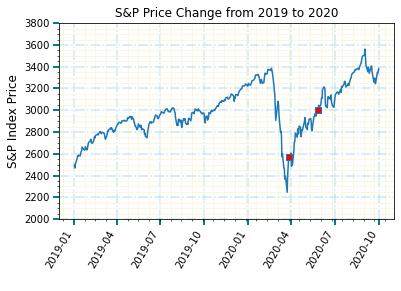

In [12]:
minvalue = SP_data.loc[SP_data['Avg Price'].idxmin()]  # Min price for Y-axis
#print(minvalue)
maxvalue = SP_data.loc[SP_data['Avg Price'].idxmax()]  # Max price for Y-axis
#print(maxvalue)

# Line chart selection
SP_data.plot.line(x='Date', y='Avg Price', legend = False, rot=60, title="S&P Price Change from 2019 to 2020",markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');

# Sets the y limits
plt.ylim(2000, 3800)

# Provides labels
plt.xlabel(" ")
plt.ylabel("S&P Index Price", fontsize=12)

# Format tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/S&P Price Change.png')

plt.show(block=True)

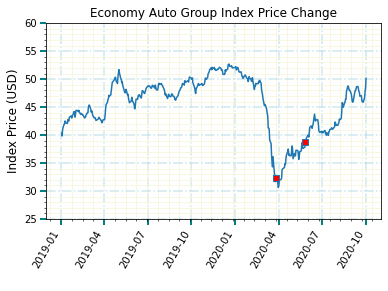

In [13]:
# Economy Auto Group Index Stock Price Change
minvalue = EconIndex.loc[EconIndex['Stock WtAvg'].idxmin()]  # Min price for Y-axis
#print(minvalue)
maxvalue = EconIndex.loc[EconIndex['Stock WtAvg'].idxmax()]  # Max price for Y-axis
#print(maxvalue)

# Line chart selection
EconIndex.plot.line(x='Date', y='Stock WtAvg', legend = False, rot=60, title="Economy Auto Group Index Price Change",markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');

# Sets the y limits
plt.ylim(25, 60)

# Provides labels
plt.xlabel(" ")
plt.ylabel("Index Price (USD)", fontsize=12)

plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/Economy AG Index Stock Price Change.png')

plt.show(block=True)

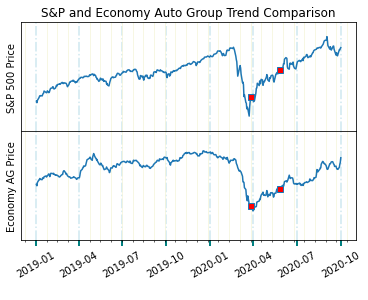

In [14]:
# S&P and Economy AG Combination Plot

fig, axs = plt.subplots(2, 1, sharex=True)

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Provides labels
plt.xlabel(" ")

# Plot tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Plot each graph, and manually set the y tick values
axs[0].plot(SP_data['Date'], SP_data['Avg Price'],markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');
axs[0].set_yticklabels(['S&P 500'])
axs[0].set_ylabel("S&P 500 Price", fontsize=10)
axs[0].set_yticks([])
axs[0].set_ylim(2000, 3800)
axs[0].title.set_text('S&P and Economy Auto Group Trend Comparison')
axs[0].grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)  # Major grid lines
axs[0].minorticks_on()  # Minor grid lines
axs[0].grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)   # Minor grid lines

axs[1].plot(EconIndex['Date'], EconIndex['Stock WtAvg'],markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');
axs[1].set_yticklabels(['Economy Auto Group Index'])
axs[1].set_ylabel("Economy AG Price", fontsize=10)
axs[1].set_yticks([])
axs[1].set_ylim(20,60)
axs[1].grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)  # Major grid lines
axs[1].minorticks_on()  # Minor grid lines
axs[1].grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)  # Minor grid lines
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=30)

# Save the figure as .png
plt.savefig('Images/S&P and Economy Auto Group Trend Comparison.png')

plt.show()

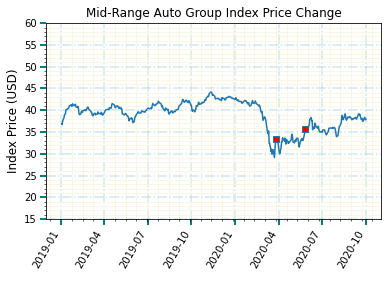

In [15]:
# Mid-Range Auto Group Index Stock Price Change
minvalue = MidRngIndex.loc[MidRngIndex['Stock WtAvg'].idxmin()]  # Min price for Y-axis
#print(minvalue)
maxvalue = MidRngIndex.loc[MidRngIndex['Stock WtAvg'].idxmax()]  # Max price for Y-axis
#print(maxvalue)

# Line chart selection
MidRngIndex.plot.line(x='Date', y='Stock WtAvg', legend = False, rot=60, title="Mid-Range Auto Group Index Price Change",markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');

# Sets the y limits
plt.ylim(15, 60)

# Provides labels
plt.xlabel(" ")
plt.ylabel("Index Price (USD)", fontsize=12)

plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/MidRange AG Index Stock Price Change.png')

plt.show(block=True)

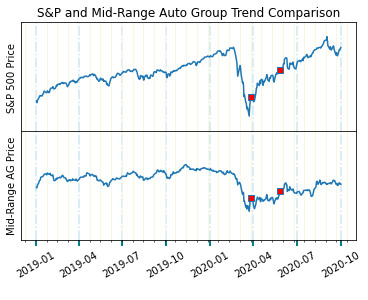

In [16]:
# S&P and Mid-Range AG Combination Plot

fig, axs = plt.subplots(2, 1, sharex=True)

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Provides labels
plt.xlabel(" ")

# Plot tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Plot each graph, and manually set the y tick values
axs[0].plot(SP_data['Date'], SP_data['Avg Price'],markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');
axs[0].set_yticklabels(['S&P 500'])
axs[0].set_ylabel("S&P 500 Price", fontsize=10)
axs[0].set_yticks([])
axs[0].set_ylim(2000, 3800)
axs[0].title.set_text('S&P and Mid-Range Auto Group Trend Comparison')
axs[0].grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)  # Major grid lines
axs[0].minorticks_on()  # Minor grid lines
axs[0].grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)   # Minor grid lines

axs[1].plot(MidRngIndex['Date'], MidRngIndex['Stock WtAvg'],markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');
axs[1].set_yticklabels(['Mid-Range Auto Group Index'])
axs[1].set_ylabel("Mid-Range AG Price", fontsize=10)
axs[1].set_yticks([])
axs[1].set_ylim(20,55)
axs[1].grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)  # Major grid lines
axs[1].minorticks_on()  # Minor grid lines
axs[1].grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)  # Minor grid lines
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=30)

# Save the figure as .png
plt.savefig('Images/S&P and Mid-Range Auto Group Trend Comparison.png')

plt.show()

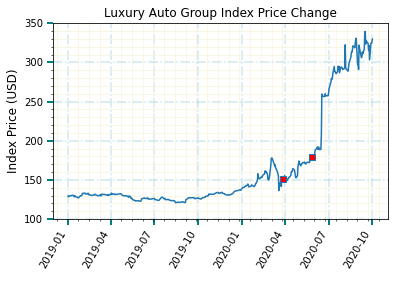

In [17]:
# Luxury Auto Group Index Stock Price Change
minvalue = LuxIndex.loc[LuxIndex['Stock WtAvg'].idxmin()]  # Min price for Y-axis
#print(minvalue)
maxvalue = LuxIndex.loc[LuxIndex['Stock WtAvg'].idxmax()]  # Max price for Y-axis
#print(maxvalue)

# Line chart selection
LuxIndex.plot.line(x='Date', y='Stock WtAvg', legend = False, rot=60, title="Luxury Auto Group Index Price Change",markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');

# Sets the y limits
plt.ylim(100, 350)

# Provides labels
plt.xlabel(" ")
plt.ylabel("Index Price (USD)", fontsize=12)

plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/Luxury AG Index Stock Price Change.png')

plt.show(block=True)

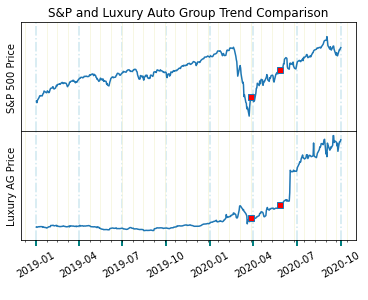

In [18]:
# S&P and Luxury AG Combination Plot

fig, axs = plt.subplots(2, 1, sharex=True)

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Provides labels
plt.xlabel(" ")

# Plot tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Plot each graph, and manually set the y tick values
axs[0].plot(SP_data['Date'], SP_data['Avg Price'],markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');
axs[0].set_yticklabels(['S&P 500'])
axs[0].set_ylabel("S&P 500 Price", fontsize=10)
axs[0].set_yticks([])
axs[0].set_ylim(2000, 3800)
axs[0].title.set_text('S&P and Luxury Auto Group Trend Comparison')
axs[0].grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)  # Major grid lines
axs[0].minorticks_on()  # Minor grid lines
axs[0].grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)   # Minor grid lines

axs[1].plot(LuxIndex['Date'], LuxIndex['Stock WtAvg'],markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');
axs[1].set_yticklabels(['Luxury Auto Group Index'])
axs[1].set_ylabel("Luxury AG Price", fontsize=10)
axs[1].set_yticks([])
axs[1].set_ylim(100, 350)
axs[1].grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)  # Major grid lines
axs[1].minorticks_on()  # Minor grid lines
axs[1].grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)  # Minor grid lines
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=30)

# Save the figure as .png
plt.savefig('Images/S&P and Luxury Auto Group Trend Comparison.png')

plt.show()

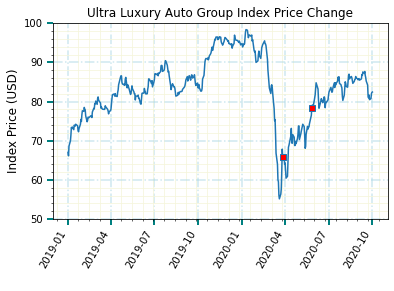

In [19]:
# Ultra Luxury Auto Group Index Stock Price Change
minvalue = UltraLuxIndex.loc[UltraLuxIndex['Stock WtAvg'].idxmin()]  # Min price for Y-axis
#print(minvalue)
maxvalue = UltraLuxIndex.loc[UltraLuxIndex['Stock WtAvg'].idxmax()]  # Max price for Y-axis
#print(maxvalue)

# Line chart selection
UltraLuxIndex.plot.line(x='Date', y='Stock WtAvg', legend = False, rot=60, title="Ultra Luxury Auto Group Index Price Change", markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');

# Sets the y limits
plt.ylim(50, 100)

# Provides labels
plt.xlabel(" ")
plt.ylabel("Index Price (USD)",fontsize=12)

# Format tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/UltraLuxury AG Index Stock Price Change.png', colors='darkblue')

plt.show(block=True)

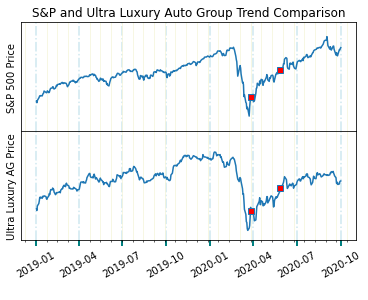

In [20]:
# S&P and Ultra Luxury AG Combination Plot

fig, axs = plt.subplots(2, 1, sharex=True)

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Provides labels
plt.xlabel(" ")

# Plot tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Plot each graph, and manually set the y tick values
axs[0].plot(SP_data['Date'], SP_data['Avg Price'],markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');
axs[0].set_yticklabels(['S&P 500'])
axs[0].set_ylabel("S&P 500 Price", fontsize=10)
axs[0].set_yticks([])
axs[0].set_ylim(2000, 3800)
axs[0].title.set_text('S&P and Ultra Luxury Auto Group Trend Comparison')
axs[0].grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)  # Major grid lines
axs[0].minorticks_on()  # Minor grid lines
axs[0].grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)   # Minor grid lines

axs[1].plot(UltraLuxIndex['Date'], UltraLuxIndex['Stock WtAvg'],markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');
axs[1].set_yticklabels(['Ultra Luxury Auto Group Index'])
axs[1].set_ylabel("Ultra Luxury AG Price", fontsize=10)
axs[1].set_yticks([])
axs[1].set_ylim(50, 110)
axs[1].grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)  # Major grid lines
axs[1].minorticks_on()  # Minor grid lines
axs[1].grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)  # Minor grid lines
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=30)

# Save the figure as .png
plt.savefig('Images/S&P and Ultra Luxury Auto Group Trend Comparison.png')

plt.show()